# 편의를 위한 함수들

## 데이터 다운로드

In [1]:
import pandas as pd


def load_data(rate=0.75):
    with open("/content/drive/MyDrive/Colab Notebooks/Machine-Learning-without-Framework/ratings.txt", "r", encoding="utf-8") as f:
        c = f.readlines()

    index1 = []
    data = []
    column = ['document', 'label']

    for i in c[1:]:
        has = i.strip('\n').split('\t')
        index1.append(int(has[0]))
        data.append([has[1], int(has[2])])

    newc = pd.DataFrame(data, index=index1, columns=column)
    newc = newc.sample(frac=1)
    amt = int(rate * len(newc))
    return newc[:amt], newc[amt:]


if __name__ == '__main__':
    train, test = load_data()
    print(train)
    print(test)


                                             document  label
5697147                                 노래를 들어보니 좋네요.      1
8485390           모야 삼다수나 미네랄월터정도는되야 먹어주지.. ㅎ 어느시대유머냐      0
2574702                                 ㅋㅋ궁금한데요??ㅋㅋㅋㅋ      1
4754175                                        최고최고ㅜㅜ      1
3839539                                     최고.....ㅠㅠ      1
...                                               ...    ...
6235565  진짜이건뭐....이렇게 인내심의한계를 시험하는 영화는 처음이다. 진짜 재미없다.      0
5456951        저도 기독교지만 말함부로하면 하나님께서 매를 드십니다 말조심해주세요~      0
216485                                            흐흐흐      1
1168076                        코메디가 웃기지 못한다면 어디에 써야하나      0
9624833                           아니 왜 드라마를 이렇게 만드냐고.      0

[150000 rows x 2 columns]
                                                   document  label
6265665                                         이완 정말 훈남이다.      1
10096240                       배우들땜에 10점주고 영화로는 =ㅁ=.. 시간아깝다      1
9051637                                 

## 모듈 설치 및 사용

In [14]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy
pip3 install kss

Process is terminated.


In [3]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [4]:
# %%bash
# bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# pip3 install /tmp/mecab-python-0.996

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from konlpy.tag import Okt, Kkma

okt = Okt()
Kkma = Kkma()

# 본 코드

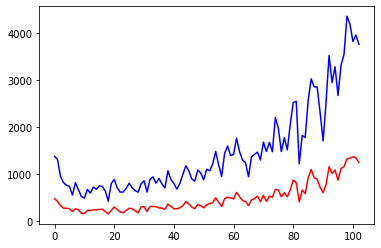

In [6]:
train, test = load_data()

x = np.arange(103)
train_id = np.zeros(103)
test_id = np.zeros(103)

for i in train.index:
  train_id[i // 100000] += 1

for i in test.index:
  test_id[i // 100000] += 1

plt.plot(x, train_id, color='blue')
plt.plot(x, test_id, color='red')
plt.show()

In [7]:
print(okt.morphs(train.iloc[1, 0]))
print(okt.pos(train.iloc[1, 0]))
print(okt.nouns(train.iloc[1, 0]))
print(list(train.iloc[1, 0]))

['자', '!', '힘차게', '망', '해보자', '역시', '한국', '애니', '의', '미래', '는', '캄캄하구나']
[('자', 'Noun'), ('!', 'Punctuation'), ('힘차게', 'Adjective'), ('망', 'Noun'), ('해보자', 'Verb'), ('역시', 'Noun'), ('한국', 'Noun'), ('애니', 'Noun'), ('의', 'Josa'), ('미래', 'Noun'), ('는', 'Josa'), ('캄캄하구나', 'Adjective')]
['자', '망', '역시', '한국', '애니', '미래']
['자', '!', ' ', '힘', '차', '게', ' ', '망', '해', '보', '자', ' ', '역', '시', ' ', '한', '국', '애', '니', '의', ' ', '미', '래', '는', ' ', '캄', '캄', '하', '구', '나']


In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
nltk.download('punkt')
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


In [12]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [15]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

ModuleNotFoundError: ignored